In [1]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# === LOAD DATA ===
df = pd.read_csv('/Users/AishwaryaD/Development/Projects/Credit Risk Assessment/Credit Risk Benchmark Dataset.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [3]:
# === FEATURE ENGINEERING ===
df['monthly_inc'] = np.log1p(df['monthly_inc'])  # reduce skew
df['delinq_score'] = df['late_30_59'] + df['late_60_89'] + df['late_90']  # combine late payments


In [4]:
# Drop original late features
df.drop(columns=['late_30_59', 'late_60_89', 'late_90'], inplace=True)


In [5]:
# Clip extreme outliers
df['rev_util'] = df['rev_util'].clip(upper=1000)
df['debt_ratio'] = df['debt_ratio'].clip(upper=1000)


In [6]:
# === DEFINE FEATURES & TARGET ===
X = df.drop(columns=['dlq_2yrs'])
y = df['dlq_2yrs']

In [7]:
# === SCALING ===
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# === TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# === ADVANCED NEURAL NETWORK MODEL ===
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# === EARLY STOPPING ===
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


In [11]:
# === TRAIN MODEL ===
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6682 - loss: 0.6576 - val_accuracy: 0.6564 - val_loss: 0.6488
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7401 - loss: 0.5467 - val_accuracy: 0.6905 - val_loss: 0.5999
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7348 - loss: 0.5341 - val_accuracy: 0.7073 - val_loss: 0.5781
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7527 - loss: 0.5185 - val_accuracy: 0.7140 - val_loss: 0.5572
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.7637 - loss: 0.5003 - val_accuracy: 0.7151 - val_loss: 0.5593
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7621 - loss: 0.4992 - val_accuracy: 0.7215 - val_loss: 0.5576
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7588 - loss: 0.5064 - val_accuracy: 0.7200 - val_loss: 0.5545
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7583 - loss: 0.505

In [12]:
# === EVALUATE MODEL ===
y_pred = (model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step

✅ Final Accuracy: 0.7523

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1672
           1       0.71      0.84      0.77      1671

    accuracy                           0.75      3343
   macro avg       0.76      0.75      0.75      3343
weighted avg       0.76      0.75      0.75      3343



In [2]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === LOAD DATA ===
df = pd.read_csv('/Users/AishwaryaD/Development/AI_Final_Project/Credit Risk Benchmark Dataset.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# === FEATURE ENGINEERING ===
df['monthly_inc'] = np.log1p(df['monthly_inc'])
df['delinq_score'] = df['late_30_59'] + df['late_60_89'] + df['late_90']
df['has_delinquency'] = (df['delinq_score'] > 0).astype(int)
df['debt_to_credit'] = df['debt_ratio'] / (df['rev_util'] + 1)

df['rev_util'] = df['rev_util'].clip(upper=1000)
df['debt_ratio'] = df['debt_ratio'].clip(upper=1000)

df.drop(columns=['late_30_59', 'late_60_89', 'late_90'], inplace=True)

# === FEATURES & TARGET ===
X = df.drop(columns=['dlq_2yrs'])
y = df['dlq_2yrs']

# === SCALING ===
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# === SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# === FINAL MODEL ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0004),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# === TRAINING ===
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === EVALUATE ===
y_pred = (model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ FINAL Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

Epoch 1/60


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.6633 - loss: 0.6222 - val_accuracy: 0.7450 - val_loss: 0.6485
Epoch 2/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.7437 - loss: 0.5315 - val_accuracy: 0.7275 - val_loss: 0.6028
Epoch 3/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7581 - loss: 0.5097 - val_accuracy: 0.7219 - val_loss: 0.6060
Epoch 4/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.7623 - loss: 0.5057 - val_accuracy: 0.7305 - val_loss: 0.5848
Epoch 5/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7599 - loss: 0.5050 - val_accuracy: 0.7350 - val_loss: 0.5783
Epoch 6/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7687 - loss: 0.5010 - val_accuracy: 0.7439 - val_loss: 0.5790
Epoch 7/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7599 - loss: 0.5039 - val_accuracy: 0.7432 - val_loss: 0.5741
Epoch 8/60
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7630 - loss: 0.5005 - val_accurac

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.5563 - loss: 0.6974 - val_accuracy: 0.6628 - val_loss: 0.6201
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.6504 - loss: 0.6274 - val_accuracy: 0.7069 - val_loss: 0.5690
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6944 - loss: 0.5984 - val_accuracy: 0.7260 - val_loss: 0.5422
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7105 - loss: 0.5843 - val_accuracy: 0.7331 - val_loss: 0.5338
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.7086 - loss: 0.5651 - val_accuracy: 0.7316 - val_loss: 0.5291
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7218 - loss: 0.5557 - val_accuracy: 0.7391 - val_loss: 0.5245
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7258 - loss: 0.5431 - val_accuracy: 0.7477 - val_loss: 0.5279
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7343 - loss: 0.5366 - val_accurac

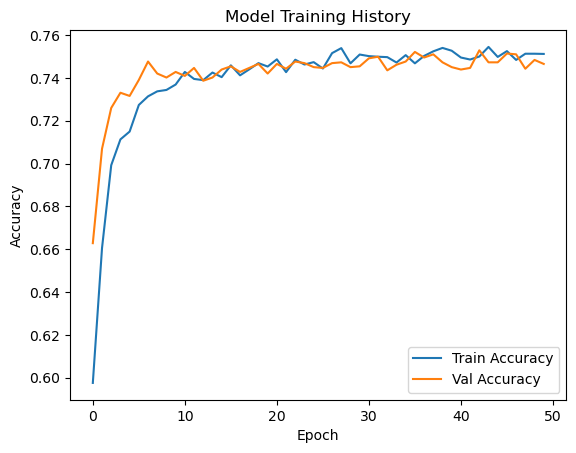

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data_path = '/Users/AishwaryaD/Development/AI_Final_Project/Credit Risk Benchmark Dataset.csv'
df = pd.read_csv(data_path)

# Features and target
X = df.drop('dlq_2yrs', axis=1)
y = df['dlq_2yrs']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Build the model
model = Sequential([
    Dense(64, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/335 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5443 - loss: 0.7916

335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.5509 - loss: 0.7768 - val_accuracy: 0.6254 - val_loss: 0.6482
Epoch 2/100
271/335 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6188 - loss: 0.6503

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.6184 - loss: 0.6499 - val_accuracy: 0.6542 - val_loss: 0.6336
Epoch 3/100
277/335 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.6346 - loss: 0.6347

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.6371 - loss: 0.6328 - val_accuracy: 0.6662 - val_loss: 0.6159
Epoch 4/100
275/335 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6645 - loss: 0.6018

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.6663 - loss: 0.6005 - val_accuracy: 0.6789 - val_loss: 0.5947
Epoch 5/100
271/335 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6869 - loss: 0.5861

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.6873 - loss: 0.5851 - val_accuracy: 0.7084 - val_loss: 0.5683
Epoch 6/100
274/335 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7063 - loss: 0.5591

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7060 - loss: 0.5601 - val_accuracy: 0.7237 - val_loss: 0.5527
Epoch 7/100
273/335 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.7076 - loss: 0.5582

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.7084 - loss: 0.5580 - val_accuracy: 0.7316 - val_loss: 0.5372
Epoch 8/100
314/335 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7226 - loss: 0.5468

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7228 - loss: 0.5468 - val_accuracy: 0.7387 - val_loss: 0.5331
Epoch 9/100
271/335 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.7287 - loss: 0.5422

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7286 - loss: 0.5426 - val_accuracy: 0.7387 - val_loss: 0.5311
Epoch 10/100
269/335 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7357 - loss: 0.5387

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.7352 - loss: 0.5387 - val_accuracy: 0.7443 - val_loss: 0.5277
Epoch 11/100
274/335 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7359 - loss: 0.5326

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.7351 - loss: 0.5339 - val_accuracy: 0.7465 - val_loss: 0.5260
Epoch 12/100
275/335 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7319 - loss: 0.5411

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.7327 - loss: 0.5401 - val_accuracy: 0.7436 - val_loss: 0.5252
Epoch 13/100
271/335 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.7336 - loss: 0.5433

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7336 - loss: 0.5420 - val_accuracy: 0.7469 - val_loss: 0.5195
Epoch 14/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.7324 - loss: 0.5334 - val_accuracy: 0.7465 - val_loss: 0.5213
Epoch 15/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.7388 - loss: 0.5300 - val_accuracy: 0.7469 - val_loss: 0.5211
Epoch 16/100
276/335 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.7395 - loss: 0.5251

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7390 - loss: 0.5264 - val_accuracy: 0.7484 - val_loss: 0.5169
Epoch 17/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7343 - loss: 0.5370 - val_accuracy: 0.7443 - val_loss: 0.5227
Epoch 18/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7474 - loss: 0.5196 - val_accuracy: 0.7439 - val_loss: 0.5248
Epoch 19/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7389 - loss: 0.5266 - val_accuracy: 0.7469 - val_loss: 0.5193
Epoch 20/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7446 - loss: 0.5263 - val_accuracy: 0.7458 - val_loss: 0.5176
Epoch 21/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7406 - loss: 0.5304 - val_accuracy: 0.7495 - val_loss: 0.5181
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7524 - loss: 0.5178
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step

Classification Report:
               precision    recall  f1-score   support

           0       0.

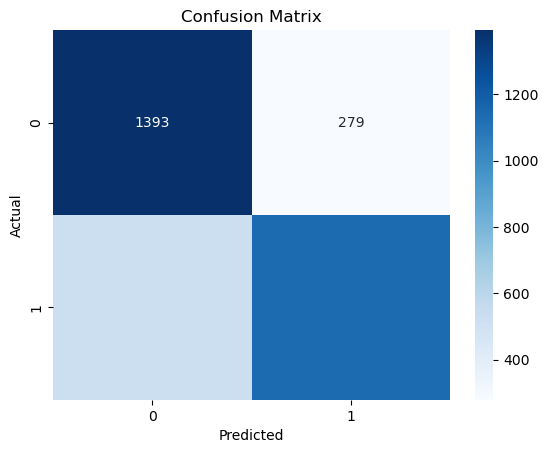

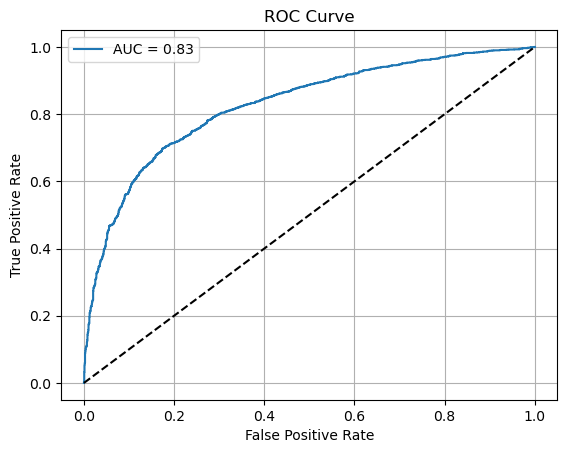

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load and clean data
data_path = '/Users/AishwaryaD/Development/AI_Final_Project/Credit Risk Benchmark Dataset.csv'
df = pd.read_csv(data_path)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['default'] = (df['dlq_2yrs'] > 0).astype(int)
df['monthly_inc'] = np.log1p(df['monthly_inc'])  # Log transform skewed feature

# Prepare features and target
X = df.drop(columns=['dlq_2yrs', 'default'])
y = df['default']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Build model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stop, checkpoint], verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Report and metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.5410 - loss: 0.6875 - val_accuracy: 0.5966 - val_loss: 0.6630
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5865 - loss: 0.6678 - val_accuracy: 0.6123 - val_loss: 0.6506
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6191 - loss: 0.6548 - val_accuracy: 0.6404 - val_loss: 0.6359
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6363 - loss: 0.6407 - val_accuracy: 0.6707 - val_loss: 0.6065
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6656 - loss: 0.6114 - val_accuracy: 0.7110 - val_loss: 0.5810
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6908 - loss: 0.5936 - val_accuracy: 0.6849 - val_loss: 0.5837
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6914 - loss: 0.5873 - val_accuracy: 0.7286 - val_loss: 0.5473
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7001 - loss: 0.5753 - val_

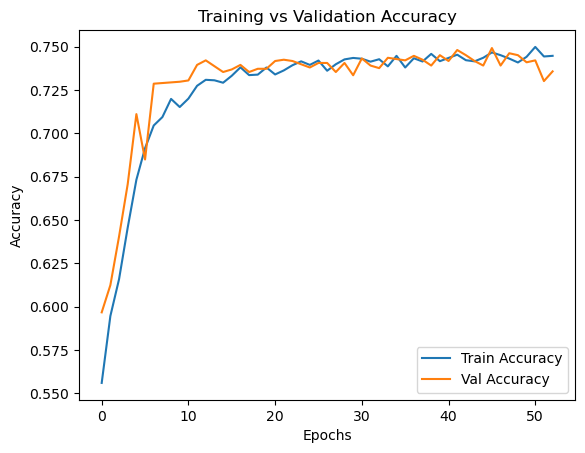

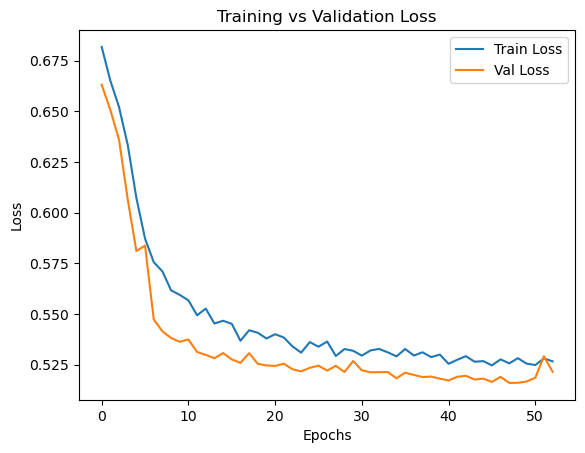

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Credit Risk Benchmark Dataset.csv")  # Update path if needed

# Clean and transform data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['default'] = (df['dlq_2yrs'] > 0).astype(int)
df['monthly_inc'] = np.log1p(df['monthly_inc'])  # Log transform

# Feature-target split
X = df.drop(columns=['dlq_2yrs', 'default'])
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the improved neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test, predicted_classes)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7093 - loss: 0.5828 - val_accuracy: 0.7196 - val_loss: 0.6210
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.7518 - loss: 0.5143 - val_accuracy: 0.7308 - val_loss: 0.6623
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7578 - loss: 0.5075 - val_accuracy: 0.7331 - val_loss: 0.6109
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7584 - loss: 0.4978 - val_accuracy: 0.7432 - val_loss: 0.5642
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.7612 - loss: 0.4993 - val_accuracy: 0.7406 - val_loss: 0.5794
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.7596 - loss: 0.4988 - val_accuracy: 0.7297 - val_loss: 0.5837
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7619 - loss: 0.4945 - val_accuracy: 0.7477 - val_loss: 0.5492
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7705 - loss: 0.4834 - val_accu

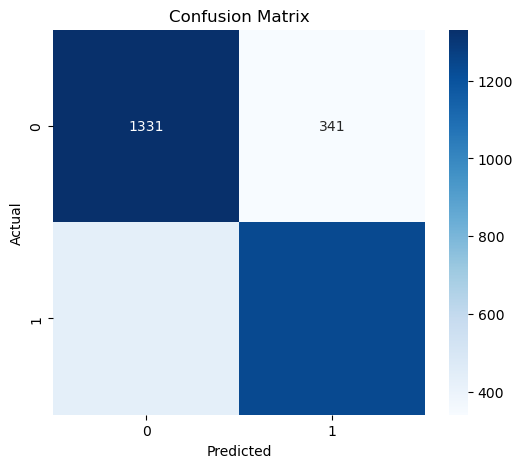


Classification Report:
              precision    recall  f1-score   support

           0     0.7537    0.7961    0.7743      1672
           1     0.7838    0.7397    0.7611      1671

    accuracy                         0.7679      3343
   macro avg     0.7687    0.7679    0.7677      3343
weighted avg     0.7687    0.7679    0.7677      3343



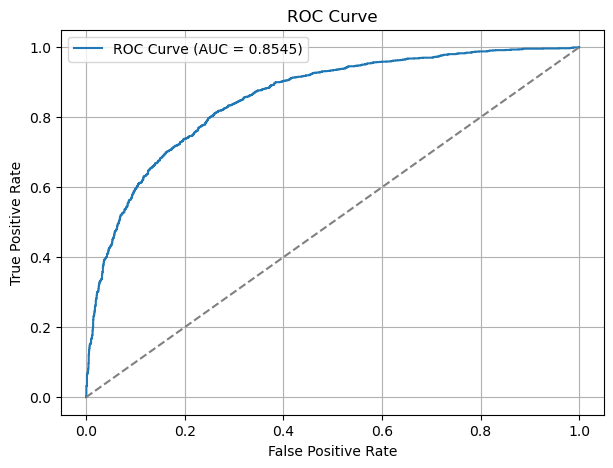

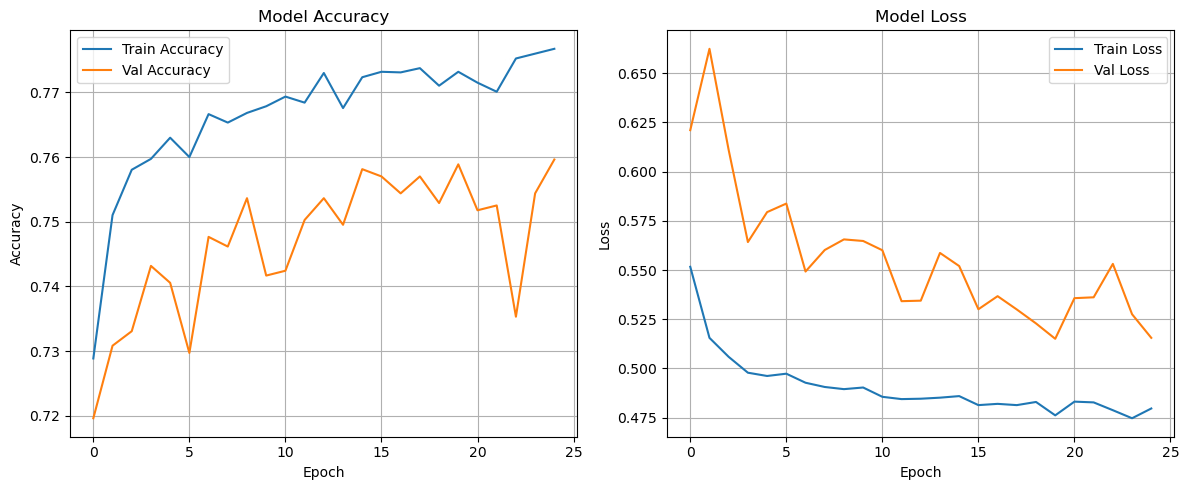

In [3]:
# === Import Required Libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and Prepare Data ===
df = pd.read_csv('/Users/AishwaryaD/Development/AI_Final_Project/Credit Risk Benchmark Dataset.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['default'] = (df['dlq_2yrs'] > 0).astype(int)
df['monthly_inc'] = np.log1p(df['monthly_inc'])  # Log transform

X = df.drop(columns=['dlq_2yrs', 'default'])
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Robust Scaling (good for skewed data)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Build Final Enhanced Neural Network Model ===
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === Evaluate Model ===
pred_probs = model.predict(X_test)
pred_labels = (pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, pred_labels)
roc = roc_auc_score(y_test, pred_probs)

print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_test, pred_labels, digits=4))

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# === Training History: Accuracy and Loss ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
